In [130]:
import numpy as np
import os
import cv2
import random

from os.path import join as pjoin
from functools import partial
from tqdm import tqdm
import matplotlib.pyplot as plt

In [131]:
def generator(path,
              size=256,
              crop_size=32,
              is_test=False):
    image_paths = [pjoin(path, img_path) for img_path in os.listdir(path)]
    img_path = random.choice(image_paths)
    img = cv2.imread(img_path, 0) #read BGR
    img = cv2.resize(img, (size, size))
    while 1:
        i, j = random.choice(list(range(size//crop_size))), random.choice(list(range(size//crop_size)))
        x = img[i*crop_size: (i+1)*crop_size, j*crop_size: (j+1)*crop_size].flatten()
        assert(x.shape[0] == (crop_size)**2)
        x = 2*x/255 - 1
        yield x[np.newaxis, ...]
            

In [139]:
dataset_path = "VOCdevkit/VOC2012/JPEGImages/"
gen = generator(dataset_path)
dataset_size = len(os.listdir(dataset_path))
print(next(gen))

[[-0.35686275 -0.65490196 -0.7254902  ... -0.15294118 -0.12156863
  -0.16862745]]


In [144]:
def glorot_uniform(input_layers, output_layers):
    limit = np.sqrt(6 / (input_layers + output_layers))
    return partial(np.random.uniform, low=-limit, high=limit)

class Autoencoder():
    def __init__(self, 
                 input_layers=1024, 
                 mid_layers=256,
                 lr=1e-4,
                 max_err=1000.0,
                 phase='train'):
        self.input_layers = input_layers
        self.mid_layers = mid_layers
        self.initializer = glorot_uniform(input_layers, mid_layers)
        self.phase=phase
        self.lr = lr
        self.max_err = max_err
        self.loss = lambda x, y: ((x - y) ** 2)
        self.build()
    
    def build(self):
        self.W1 = self.initializer(size=[self.input_layers, self.mid_layers])
        self.W2 = self.initializer(size=[self.mid_layers, self.input_layers])
    
    def __call__(self, inp):
        mid, res = self.forward(inp)
        err = self.loss(inp, res)
            
        if self.phase == 'train':
            if abs(err.mean()) < self.max_err:
                self.backward(inp, mid, err)
                return err.mean()
            else:
                return self.max_err
        else:
            return res
    
    def forward(self, inp):
        mid = self.encode(inp)
        return mid, self.decode(mid)
    
    def backward(self, inp, mid, err):
        lr = 1/np.dot(mid, mid.T)**2
        self.W2 -= lr * np.dot(mid.T, err)
        lr = 1/np.dot(inp, inp.T)**2
        self.W1 -= lr * np.dot(np.dot(inp.T, err), self.W2.T)
                          
    def encode(self, inp):
        return np.dot(inp, self.W1)
    
    def decode(self, mid):
        return np.dot(mid, self.W2)

EPOCH 0 MSE 55.15792067071371
EPOCH 1 MSE 999.9936179656769
EPOCH 2 MSE 1000.0
EPOCH 3 MSE 1000.0
EPOCH 4 MSE 1000.0
EPOCH 5 MSE 1000.0
EPOCH 6 MSE 1000.0
EPOCH 7 MSE 1000.0
EPOCH 8 MSE 1000.0
EPOCH 9 MSE 1000.0
EPOCH 10 MSE 1000.0
EPOCH 11 MSE 1000.0
EPOCH 12 MSE 1000.0
EPOCH 13 MSE 1000.0
EPOCH 14 MSE 1000.0
EPOCH 15 MSE 1000.0
EPOCH 16 MSE 1000.0
EPOCH 17 MSE 1000.0
EPOCH 18 MSE 1000.0
EPOCH 19 MSE 1000.0
EPOCH 20 MSE 1000.0
EPOCH 21 MSE 1000.0
EPOCH 22 MSE 1000.0
EPOCH 23 MSE 1000.0
EPOCH 24 MSE 1000.0
EPOCH 25 MSE 1000.0
EPOCH 26 MSE 1000.0
EPOCH 27 MSE 1000.0
EPOCH 28 MSE 1000.0
EPOCH 29 MSE 1000.0
EPOCH 30 MSE 1000.0
EPOCH 31 MSE 1000.0
EPOCH 32 MSE 1000.0
EPOCH 33 MSE 1000.0
EPOCH 34 MSE 1000.0
EPOCH 35 MSE 1000.0
EPOCH 36 MSE 1000.0
EPOCH 37 MSE 1000.0
EPOCH 38 MSE 1000.0
EPOCH 39 MSE 1000.0
EPOCH 40 MSE 1000.0
EPOCH 41 MSE 1000.0
EPOCH 42 MSE 1000.0
EPOCH 43 MSE 1000.0
EPOCH 44 MSE 1000.0
EPOCH 45 MSE 1000.0
EPOCH 46 MSE 1000.0
EPOCH 47 MSE 1000.0
EPOCH 48 MSE 1000.0
EPOCH 49

EPOCH 404 MSE 1000.0
EPOCH 405 MSE 1000.0
EPOCH 406 MSE 1000.0
EPOCH 407 MSE 1000.0
EPOCH 408 MSE 1000.0
EPOCH 409 MSE 1000.0
EPOCH 410 MSE 1000.0
EPOCH 411 MSE 1000.0
EPOCH 412 MSE 1000.0
EPOCH 413 MSE 1000.0
EPOCH 414 MSE 1000.0
EPOCH 415 MSE 1000.0
EPOCH 416 MSE 1000.0
EPOCH 417 MSE 1000.0
EPOCH 418 MSE 1000.0
EPOCH 419 MSE 1000.0
EPOCH 420 MSE 1000.0
EPOCH 421 MSE 1000.0
EPOCH 422 MSE 1000.0
EPOCH 423 MSE 1000.0
EPOCH 424 MSE 1000.0
EPOCH 425 MSE 1000.0
EPOCH 426 MSE 1000.0
EPOCH 427 MSE 1000.0
EPOCH 428 MSE 1000.0
EPOCH 429 MSE 1000.0
EPOCH 430 MSE 1000.0
EPOCH 431 MSE 1000.0
EPOCH 432 MSE 1000.0
EPOCH 433 MSE 1000.0
EPOCH 434 MSE 1000.0
EPOCH 435 MSE 1000.0
EPOCH 436 MSE 1000.0
EPOCH 437 MSE 1000.0
EPOCH 438 MSE 1000.0
EPOCH 439 MSE 1000.0
EPOCH 440 MSE 1000.0
EPOCH 441 MSE 1000.0
EPOCH 442 MSE 1000.0
EPOCH 443 MSE 1000.0
EPOCH 444 MSE 1000.0
EPOCH 445 MSE 1000.0
EPOCH 446 MSE 1000.0
EPOCH 447 MSE 1000.0
EPOCH 448 MSE 1000.0
EPOCH 449 MSE 1000.0
EPOCH 450 MSE 1000.0
EPOCH 451 MSE

EPOCH 798 MSE 1000.0
EPOCH 799 MSE 1000.0
EPOCH 800 MSE 1000.0
EPOCH 801 MSE 1000.0
EPOCH 802 MSE 1000.0
EPOCH 803 MSE 1000.0
EPOCH 804 MSE 1000.0
EPOCH 805 MSE 1000.0
EPOCH 806 MSE 1000.0
EPOCH 807 MSE 1000.0
EPOCH 808 MSE 1000.0
EPOCH 809 MSE 1000.0
EPOCH 810 MSE 1000.0
EPOCH 811 MSE 1000.0
EPOCH 812 MSE 1000.0
EPOCH 813 MSE 1000.0
EPOCH 814 MSE 1000.0
EPOCH 815 MSE 1000.0
EPOCH 816 MSE 1000.0
EPOCH 817 MSE 1000.0
EPOCH 818 MSE 1000.0
EPOCH 819 MSE 1000.0
EPOCH 820 MSE 1000.0
EPOCH 821 MSE 1000.0
EPOCH 822 MSE 1000.0
EPOCH 823 MSE 1000.0
EPOCH 824 MSE 1000.0
EPOCH 825 MSE 1000.0
EPOCH 826 MSE 1000.0
EPOCH 827 MSE 1000.0
EPOCH 828 MSE 1000.0
EPOCH 829 MSE 1000.0
EPOCH 830 MSE 1000.0
EPOCH 831 MSE 1000.0
EPOCH 832 MSE 1000.0
EPOCH 833 MSE 1000.0
EPOCH 834 MSE 1000.0
EPOCH 835 MSE 1000.0
EPOCH 836 MSE 1000.0
EPOCH 837 MSE 1000.0
EPOCH 838 MSE 1000.0
EPOCH 839 MSE 1000.0
EPOCH 840 MSE 1000.0
EPOCH 841 MSE 1000.0
EPOCH 842 MSE 1000.0
EPOCH 843 MSE 1000.0
EPOCH 844 MSE 1000.0
EPOCH 845 MSE

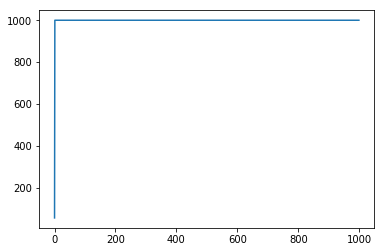

In [145]:
model = Autoencoder()
momentum = 0.95
errors = []
for epoch in range(1000):
    moving_err = None
    for it in range(160):
        inp = next(gen)
        err = model(inp)
        moving_err = momentum * moving_err + err * (1. - momentum) if moving_err else err
    errors.append(moving_err)
    print("EPOCH {} MSE {}".format(epoch, moving_err))

plt.plot(np.arange(1000), np.array(errors))
plt.show()